## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers
#### 5. Export dataframe

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\admin\Desktop\New York rentals Dataset'

In [5]:
df_rentals = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'rental_merged.csv'))

### 2. Data cleaning

In [7]:
df_rentals.columns

Index(['Unnamed: 0', 'id', 'neighborhood', 'latitude', 'longitude',
       'room_type', 'price', 'days_occupied_in_2019', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'availability_2020',
       'Price category'],
      dtype='object')

In [8]:
# we use this code to drop unnecessary column
df_rentals = df_rentals.drop('Unnamed: 0', axis=1)


In [9]:
df_rentals.head(20)

,id,neighborhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020,Price category
0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1,Middle price
1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1,Low price
2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19,Middle price
3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365,Low price
4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242,Low price
5,5238,Lower East Side,40.71344,-73.99037,Entire home/apt,150,86,1,161,1.29,1,Low price
6,5441,Manhattan,40.76076,-73.98867,Private room,85,323,3,204,1.56,10,Low price
7,5803,Park Slope,40.66829,-73.98779,Private room,89,12,4,175,1.35,0,Low price
8,6090,Manhattan,40.73530,-74.00525,Entire home/apt,120,226,180,27,0.22,271,Low price
9,6848,Williamsburg,40.70837,-73.95352,Entire home/apt,140,319,2,170,1.33,0,Low price


In [10]:
df_rentals.shape

(17614, 12)

##### Missing values

In [11]:
# Check for missing values

df_rentals.isnull().sum()

# No missing values to handle

id                       0
neighborhood             0
latitude                 0
longitude                0
room_type                0
price                    0
days_occupied_in_2019    0
minimum_nights           0
number_of_reviews        0
reviews_per_month        0
availability_2020        0
Price category           0
dtype: int64

##### Duplicates check

In [12]:
dups = df_rentals.duplicated()

In [13]:
dups.shape # No dups

(17614,)

##### Hypothesis

The more reviews a rental unit has the more monthly reviews it tends to receive?

##### Extreme values checks

C:\Users\admin\AppData\Local\Temp\ipykernel_15068\3814426798.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rentals['reviews_per_month'], bins=25) # Shows extreme values


<Axes: xlabel='reviews_per_month', ylabel='Density'>

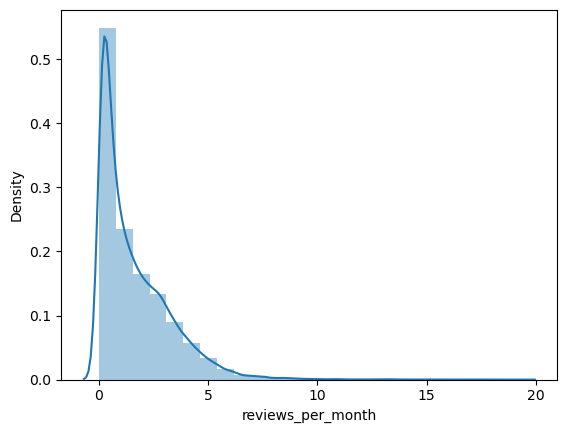

In [19]:
sns.distplot(df_rentals['reviews_per_month'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [20]:
df_rentals['reviews_per_month'].mean() # Check the mean

1.607059725218576

In [21]:
df_rentals['reviews_per_month'].median() # Check the median

1.06

In [22]:
df_rentals['reviews_per_month'].max() # Check the max

19.25

### 3. Data prep for regression analysis 

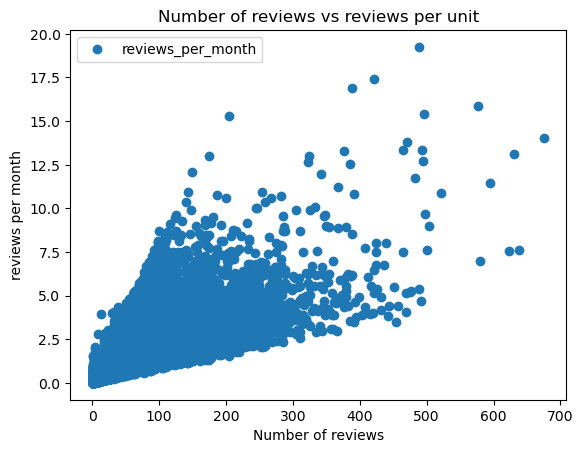

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_rentals.plot(x = 'number_of_reviews', y='reviews_per_month',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of reviews vs reviews per unit')  
plt.xlabel('Number of reviews')  
plt.ylabel('reviews per month')  
plt.show()

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_rentals['number_of_reviews'].values.reshape(-1,1)
y = df_rentals['reviews_per_month'].values.reshape(-1,1)

In [27]:
X

array([[ 48],
       [295],
       [ 78],
       ...,
       [  2],
       [  1],
       [  3]], dtype=int64)

In [28]:
y

array([[0.39],
       [4.67],
       [0.6 ],
       ...,
       [0.12],
       [0.27],
       [0.13]])

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [30]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [31]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

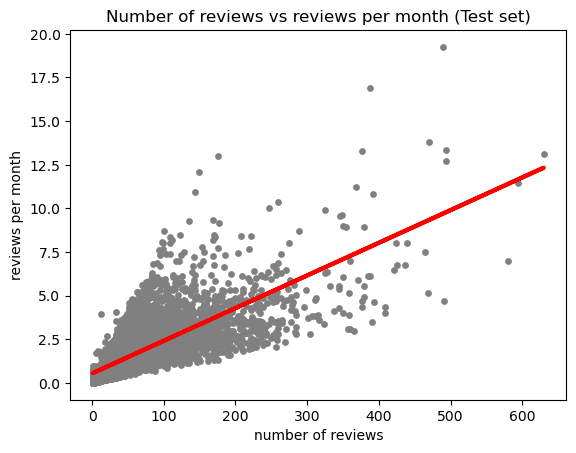

In [49]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of reviews vs reviews per month (Test set)')
plot_test.xlabel('number of reviews')
plot_test.ylabel('reviews per month')
plot_test.show()

In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01869818]]
Mean squared error:  1.2059583367722986
R2 score:  0.5729491591271929


In [36]:
y_predicted

array([[1.39586842],
       [0.64794131],
       [1.73243562],
       ...,
       [3.99491514],
       [1.04060305],
       [1.09669758]])

In [37]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.49,1.395868
1,0.10,0.647941
2,0.99,1.732436
3,1.03,1.844625
4,0.17,0.610545
5,1.20,0.891018
6,3.99,3.228290
7,0.35,0.872319
8,0.33,1.115396
9,0.98,2.237286


##### Compare how the regression fits the training set

In [38]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01869818]]
Mean squared error:  1.1266495612247185
R2 score:  0.5683989015859279


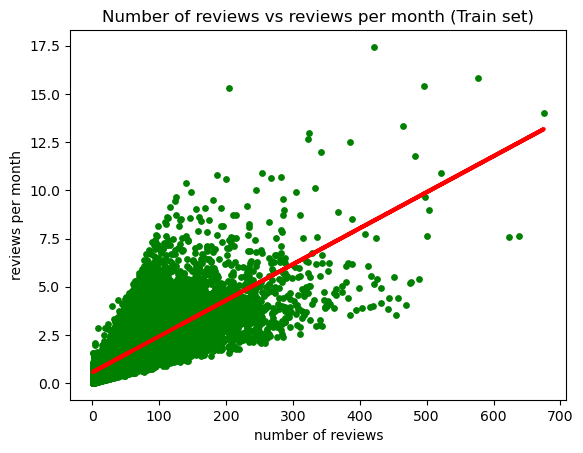

In [50]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of reviews vs reviews per month (Train set)')
plot_test.xlabel('number of reviews')
plot_test.ylabel('reviews per month')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [46]:
# Check how many extreme values

df_rentals[df_rentals['reviews_per_month'] >12]

,id,neighborhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020,Price category
1542,30348624,Jamaica,40.66272,-73.76849,Entire home/apt,89,21,1,149,12.11,1,Low price
1545,21366188,Jamaica,40.66875,-73.78506,Entire home/apt,96,23,1,324,12.99,0,Low price
1559,29489893,Jamaica,40.68547,-73.79063,Entire home/apt,20,290,1,175,13.03,41,Low price
1889,20196339,Queens,40.66941,-73.79148,Entire home/apt,54,51,1,377,13.29,0,Low price
1921,15262831,Queens,40.66735,-73.76647,Entire home/apt,49,220,1,494,12.73,119,Low price
1941,28826608,Queens,40.66457,-73.76918,Entire home/apt,75,329,1,204,15.30,166,Low price
10737,18173787,East Elmhurst,40.76380,-73.87238,Private room,48,145,1,496,15.40,349,Low price
11179,16814205,Jamaica,40.67949,-73.79841,Private room,53,293,1,464,13.33,78,Low price
11183,22176831,Jamaica,40.66158,-73.77050,Private room,50,305,1,421,17.44,50,Low price
11186,21550302,Jamaica,40.66110,-73.76830,Private room,80,317,1,489,19.25,54,Low price


In [47]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_rentals[df_rentals['reviews_per_month'] <=12] 

In [48]:
df_test.shape

(17596, 12)

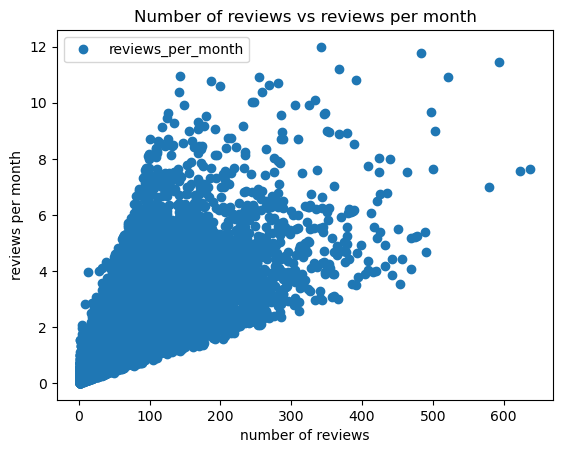

In [51]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'number_of_reviews', y='reviews_per_month', style='o')  
plt.title('Number of reviews vs reviews per month')  
plt.xlabel('number of reviews')  
plt.ylabel('reviews per month')  
plt.show()

In [53]:
# Reshape again.

X_2 = df_test['number_of_reviews'].values.reshape(-1,1)
y_2 = df_test['reviews_per_month'].values.reshape(-1,1)

In [54]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [55]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [56]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [57]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [58]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01834168]]
Mean squared error:  1.1587406215699252
R2 score:  0.5437226140838591


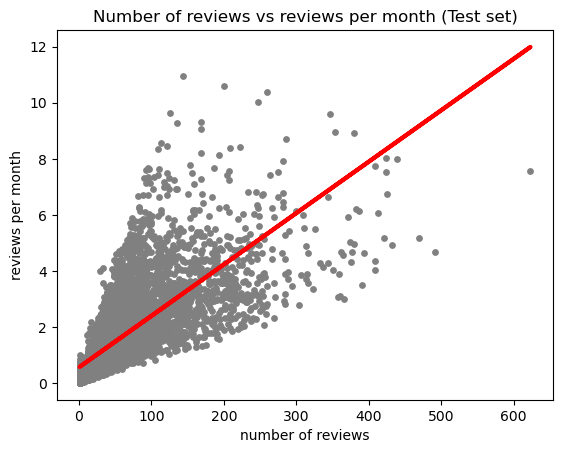

In [59]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Number of reviews vs reviews per month (Test set)')
plot_test.xlabel('number of reviews')
plot_test.ylabel('reviews per month')
plot_test.show()

The best-fit line shows a positive trend, which means that as the number of reviews increases, the reviews per month tend to increase as well. The density of the data points is concentrated towards the lower end of the number of reviews, indicating that most rental units have a fewer number of total reviews and reviews per month. As we move towards the higher end of the number of reviews, the data points spread out more, suggesting more variability in the reviews per month for units with a high number of reviews. While the line appears to capture the general upward trend, there is noticeable scatter around the line, especially as the number of reviews increases. This shows that there are other factors influencing the reviews per month that are not being captured by this simple linear model.

In [60]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0.45,1.003873
1,2.91,1.407390
2,1.38,0.930506
3,0.21,0.783772
4,0.81,1.389048
5,3.15,2.672966
6,1.14,1.609148
7,1.69,2.507890
8,2.91,2.141057
9,0.50,0.985531


the model has a decent level of predictive power, but there are certainly individual predictions where the model is not as accurate. 

linear model's performance on the test set is moderate, as indicated by the R-squared score of 0.5437226140838591. This score reflects that approximately 57% of the variability in the reviews per month can be explained by the number of reviews.One thing we know is that while the number of reviews is an important factor in reviews per month, its not the only one. This just confirms a single regression line as not being the most accurate prediction model. 

The potential data bias could stem from the fact that new listings or those less frequently rented may have fewer reviews due to less exposure, while popular listings could accumulate reviews more quickly over time, which could skew the relationship between total reviews and reviews per month

# 5. Export data

In [61]:
df_rentals.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'rental_merged_new.csv'))